In [3]:
import pandas as pd
df= pd.read_csv("D:\\Neural networks\\Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
print("Shape of the dataset:", df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] )
print("Classes:", df['letter'].unique())

Shape of the dataset: (20000, 17)
Number of samples: 20000
Number of features: 17
Classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(df.drop(columns=['letter']))

In [21]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder
# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [11]:
X_normalized

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [23]:

# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']

In [24]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

In [25]:

# Initialize the ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer and first hidden layer
model.add(Dense(units=26, activation='softmax'))  # Output layer (26 classes for each letter of the alphabet)

ModuleNotFoundError: No module named 'tensorflow'

In [27]:
#Model Training
from sklearn.neural_network import MLPClassifier

ann_classifier = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100)
ann_classifier.fit(X_train, y_train)

C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

In [28]:
y_pred = ann_classifier.predict(X_test)

In [29]:
# Print the classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.90      0.91       149
           B       0.66      0.72      0.69       153
           C       0.82      0.72      0.77       137
           D       0.75      0.82      0.78       156
           E       0.74      0.78      0.76       141
           F       0.61      0.77      0.68       140
           G       0.64      0.57      0.61       160
           H       0.68      0.53      0.59       144
           I       0.88      0.79      0.83       146
           J       0.88      0.79      0.83       149
           K       0.65      0.71      0.68       130
           L       0.87      0.79      0.82       155
           M       0.91      0.89      0.90       168
           N       0.90      0.79      0.84       151
           O       0.72      0.77      0.74       145
           P       0.91      0.84      0.88       173
           Q       0.79      0.80      0.79       166
    

In [30]:
from sklearn.model_selection import GridSearchCV
#Defining  the parameter grid here

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [31]:
# Creating  a grid search object
grid_search = GridSearchCV(ann_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cherry\D\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: Convergenc

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [32]:
#Evaluating  the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Best Cross-Validation Score: 0.9494997613391333


In [33]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.96      0.98      0.97       149
           B       0.93      0.95      0.94       153
           C       0.95      0.93      0.94       137
           D       0.96      0.98      0.97       156
           E       0.91      0.96      0.94       141
           F       0.95      0.98      0.96       140
           G       0.97      0.94      0.96       160
           H       0.96      0.90      0.93       144
           I       0.99      0.96      0.98       146
           J       0.97      0.98      0.97       149
           K       0.95      0.93      0.94       130
           L       0.95      0.97      0.96       155
           M       0.99      0.98      0.98       168
           N       0.97      0.95      0.96       151
           O       0.97      0.97      0.97       145
           P       0.98      0.97      0.98       173
           Q       0.99      0.96      0.98       166
    

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Default model evaluation
y_pred_default = ann_classifier.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

In [35]:
# Tuned model evaluation
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
# Print the evaluation metrics
print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1-score:", f1_default)

Default Model:
Accuracy: 0.77425
Precision: 0.777943076063756
Recall: 0.77425
F1-score: 0.7742550544525184


In [36]:
print("Tuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)

Tuned Model:
Accuracy: 0.96375
Precision: 0.9641422897701569
Recall: 0.96375
F1-score: 0.9637763898339415


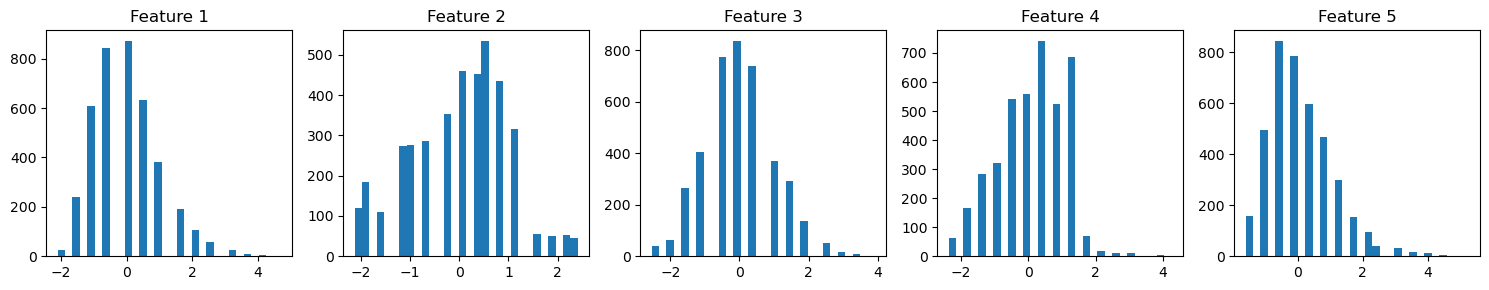

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your input data (features)
# Plot histograms of some features
num_features_to_plot = 5
fig, axes = plt.subplots(1, num_features_to_plot, figsize=(15, 3))
for i in range(num_features_to_plot):
    axes[i].hist(X_test[:, i], bins=30)
    axes[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


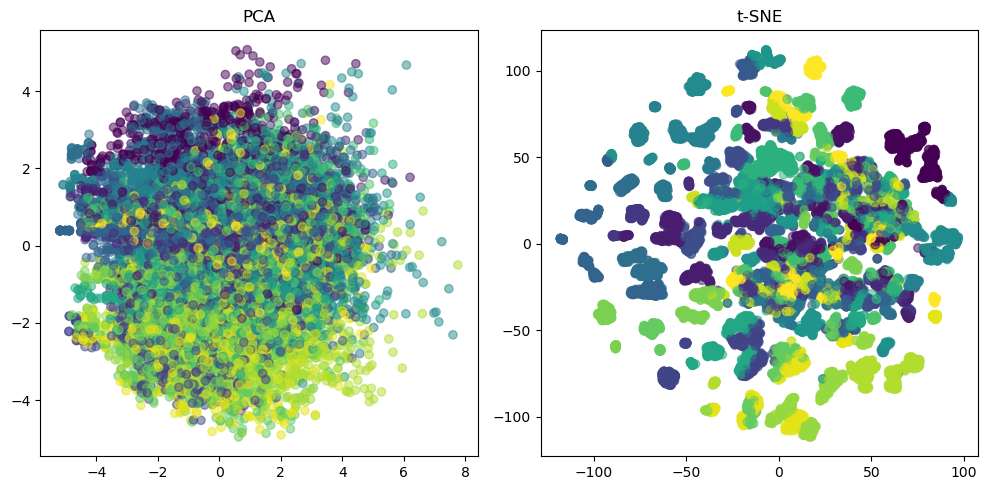

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming X_train is your high-dimensional input data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

tsne = TSNE(n_components=2, perplexity=30.0)
tsne_result = tsne.fit_transform(X_train)

# Plot PCA and t-SNE results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('t-SNE')

plt.tight_layout()
plt.show()



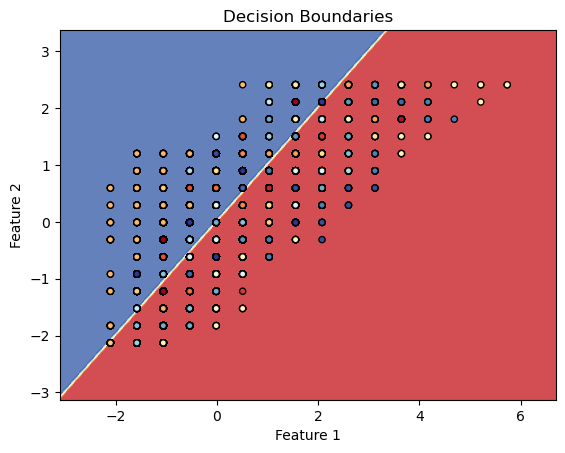

In [43]:
# Assuming a simple 2D classification example
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = (np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, s=20, edgecolors='k')
plt.title('Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
